In [1]:
import pandas as pd
import seaborn as sns #visualization

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
sample_df = pd.read_csv("/content/sample_submission_O1oDc4H.csv")
Test_df = pd.read_csv("/content/test_pFkWwen.csv")
Train_df = pd.read_csv("/content/train_yaOffsB.csv")
Test_Original = Test_df.copy()
Train_Origial = Train_df.copy()
#Reading the data and saving a copy of them

EDA

In [3]:
Test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59310 entries, 0 to 59309
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       59310 non-null  object 
 1   Estimated_Insects_Count  59310 non-null  int64  
 2   Crop_Type                59310 non-null  int64  
 3   Soil_Type                59310 non-null  int64  
 4   Pesticide_Use_Category   59310 non-null  int64  
 5   Number_Doses_Week        59310 non-null  int64  
 6   Number_Weeks_Used        53417 non-null  float64
 7   Number_Weeks_Quit        59310 non-null  int64  
 8   Season                   59310 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 4.1+ MB


In [4]:
Train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       88858 non-null  object 
 1   Estimated_Insects_Count  88858 non-null  int64  
 2   Crop_Type                88858 non-null  int64  
 3   Soil_Type                88858 non-null  int64  
 4   Pesticide_Use_Category   88858 non-null  int64  
 5   Number_Doses_Week        88858 non-null  int64  
 6   Number_Weeks_Used        79858 non-null  float64
 7   Number_Weeks_Quit        88858 non-null  int64  
 8   Season                   88858 non-null  int64  
 9   Crop_Damage              88858 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 6.8+ MB


In [5]:
#crop_Damage is the Target variable
Test_df.isnull().sum()
#Number_Weeks_Used variable has 5893 missing values dtype is float64.

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          5893
Number_Weeks_Quit             0
Season                        0
dtype: int64

In [6]:
Train_df.isnull().sum()
#Number_Weeks_Used has 9000 missing values dtype float64.

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

In [7]:
Test_df.head(10)

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1
5,F00000015,851,0,1,1,0,0.0,0,2
6,F00000016,851,1,0,1,0,NaN,0,3
7,F00000019,1056,1,0,1,0,0.0,0,1
8,F00000025,1576,1,0,1,0,0.0,0,2
9,F00000026,1576,1,0,1,0,0.0,0,1


In [8]:
Train_df.head(10)

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
5,F00000008,448,0,1,1,0,NaN,0,2,1
6,F00000009,448,0,1,1,0,NaN,0,2,1
7,F00000010,577,1,0,1,0,0.0,0,1,2
8,F00000012,731,0,0,1,0,0.0,0,2,0
9,F00000020,1132,1,0,1,0,0.0,0,1,2


In [9]:
Train_df['Number_Weeks_Used'].value_counts()

20.0    3878
30.0    3765
25.0    3120
40.0    2707
15.0    2486
        ... 
63.0      50
64.0      44
65.0      31
66.0      17
67.0       8
Name: Number_Weeks_Used, Length: 64, dtype: int64

IMPUTATION

In [10]:
import numpy as np


In [11]:
#--update can be made here--
Train_df['Number_Weeks_Used'].fillna(Train_df['Number_Weeks_Used'].median(), inplace=True) 
#we should use mean or median for numerical values

In [12]:
#Same changes should be made to test data too.
Test_df['Number_Weeks_Used'].fillna(Test_df['Number_Weeks_Used'].median(),inplace = True)

In [13]:
#from sklearn.linear_model import LogisticRegression #modelling
#from sklearn.model_selection import train_test_split #splitting the data

In [14]:
Test_df.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
dtype: int64

In [15]:
Train_df.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

In [16]:
#no missing values in both train and test

In [17]:
Train_df.head(10)

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
5,F00000008,448,0,1,1,0,28.0,0,2,1
6,F00000009,448,0,1,1,0,28.0,0,2,1
7,F00000010,577,1,0,1,0,0.0,0,1,2
8,F00000012,731,0,0,1,0,0.0,0,2,0
9,F00000020,1132,1,0,1,0,0.0,0,1,2


Transform

In [18]:
Train_df['Number_Weeks_Used']= Train_df['Number_Weeks_Used'].astype(int)

In [19]:
Train_df.head(10)

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0,0,1,0
1,F00000003,209,1,0,1,0,0,0,2,1
2,F00000004,257,1,0,1,0,0,0,2,1
3,F00000005,257,1,1,1,0,0,0,2,1
4,F00000006,342,1,0,1,0,0,0,2,1
5,F00000008,448,0,1,1,0,28,0,2,1
6,F00000009,448,0,1,1,0,28,0,2,1
7,F00000010,577,1,0,1,0,0,0,1,2
8,F00000012,731,0,0,1,0,0,0,2,0
9,F00000020,1132,1,0,1,0,0,0,1,2


In [20]:
Test_df['Number_Weeks_Used']= Test_df['Number_Weeks_Used'].astype(int)

In [21]:
Test_df.head(10)

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,28,0,2
1,F00000007,410,1,1,1,0,0,0,2
2,F00000011,626,1,0,1,0,0,0,2
3,F00000013,731,1,0,1,0,0,0,2
4,F00000014,789,0,0,1,0,0,0,1
5,F00000015,851,0,1,1,0,0,0,2
6,F00000016,851,1,0,1,0,28,0,3
7,F00000019,1056,1,0,1,0,0,0,1
8,F00000025,1576,1,0,1,0,0,0,2
9,F00000026,1576,1,0,1,0,0,0,1


In [22]:
Feature_cols = ['Estimated_Insects_Count','Crop_Type','Soil_Type','Pesticide_Use_Category','Number_Doses_Week','Number_Weeks_Used','Number_Weeks_Quit','Season']
#Features Selected

In [23]:
Target_col = Train_df.Crop_Damage
#Target column

Modeling

In [24]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [25]:
Train_df = Train_df.drop('Crop_Damage',axis= 1)
Train_df_FeatureCols = Train_df[Feature_cols]
Test_df_Feature_cols = Test_df[Feature_cols]

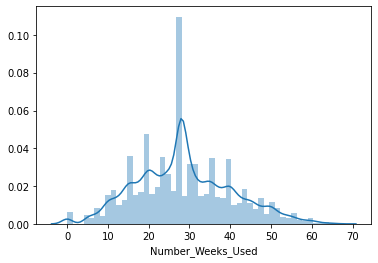

In [26]:
sns.distplot(Train_df_FeatureCols['Number_Weeks_Used'])

In [27]:
# i=1 
# kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
# for train_index,test_index in kf.split(Train_df_FeatureCols,Target_col):     
#  print('\n{} of kfold {}'.format(i,kf.n_splits))     
# xtr,xvl = Train_df_FeatureCols.loc[train_index],Train_df_FeatureCols.loc[test_index]    
# ytr,yvl = Target_col[train_index],Target_col[test_index]         
# model = LogisticRegression(random_state=1)     
# model.fit(xtr, ytr)     
# pred_test = model.predict(xvl)     
# score = accuracy_score(yvl,pred_test)     
# print('accuracy_score',score)     
# i+=1 
# pred_test = model.predict(Test_df_Feature_cols) 
# pred=model.predict_proba(xvl)[:,1]

In [28]:
Train_df_FeatureCols['Total_Doses'] = np.multiply(Train_df_FeatureCols['Number_Doses_Week'], Train_df_FeatureCols['Number_Weeks_Used'])
Test_df_Feature_cols['Total_Doses'] = np.multiply(Test_df_Feature_cols['Number_Doses_Week'], Test_df_Feature_cols['Number_Weeks_Used'])
Train_df_FeatureCols['Total_Doses'].head(10)
Test_df_Feature_cols['Total_Doses'].head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: Total_Doses, dtype: int64

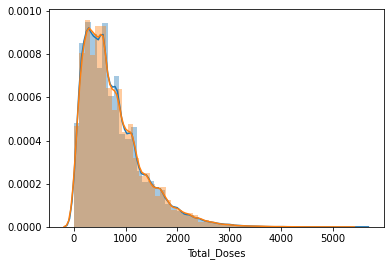

In [29]:
sns.distplot(Train_df_FeatureCols['Total_Doses'])
sns.distplot(Test_df_Feature_cols['Total_Doses'])

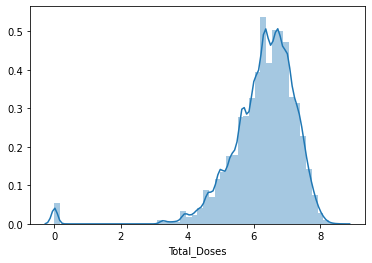

In [30]:
# log_max = np.log(Train_df_FeatureCols['Total_Doses'].max())
# Train_df_FeatureCols['Total_Doses'] = Train_df_FeatureCols['Total_Doses']**(1/log_max)
# Train_df_FeatureCols['Total_Doses'] = np.random.normal(Train_df_FeatureCols['Total_Doses'])
# Train_df_FeatureCols['Total_Doses'] = np.log(Train_df_FeatureCols['Total_Doses'] + 1)
# Train_df_FeatureCols['Total_Doses'] = np.random.lognormal(Train_df_FeatureCols['Total_Doses'])
# Train_df_FeatureCols['Total_Doses'] = np.round(Train_df_FeatureCols['Total_Doses'])
# Train_df_FeatureCols['Total_Doses'] = Train_df_FeatureCols['Total_Doses'].replace(inf,0)

Train_df_FeatureCols['Total_Doses'] = np.log(Train_df_FeatureCols.Total_Doses+1)
# Train_df_FeatureCols['Total_Doses'].value_counts()
sns.distplot(Train_df_FeatureCols['Total_Doses']);

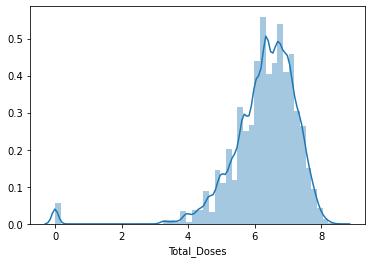

In [31]:
# log_max_Test = np.log(Test_df_Feature_cols['Total_Doses'].max())
# Test_df_Feature_cols['Total_Doses'] = Test_df_Feature_cols['Total_Doses']**(1/log_max_Test)
# Test_df_Feature_cols['Total_Doses'] = np.random.normal(Test_df_Feature_cols['Total_Doses'])
Test_df_Feature_cols['Total_Doses'] = np.log(Test_df_Feature_cols.Total_Doses+1)
sns.distplot(Test_df_Feature_cols['Total_Doses']);

In [32]:
Train_df_FeatureCols['Total_Doses']= Train_df_FeatureCols['Total_Doses'].astype(int)
Test_df_Feature_cols['Total_Doses']= Test_df_Feature_cols['Total_Doses'].astype(int)
Train_df_FeatureCols.head(10)
Train_df_FeatureCols['Total_Crop_Time'] = np.add(Train_df_FeatureCols['Number_Weeks_Used'],Train_df_FeatureCols['Number_Weeks_Quit'])
Train_df_FeatureCols.drop(['Number_Doses_Week','Number_Weeks_Used','Number_Weeks_Quit'],axis = 1)

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Season,Total_Doses,Total_Crop_Time
0,188,1,0,1,1,0,0
1,209,1,0,1,2,0,0
2,257,1,0,1,2,0,0
3,257,1,1,1,2,0,0
4,342,1,0,1,2,0,0
...,...,...,...,...,...,...,...
88853,3337,1,0,2,3,4,56
88854,3516,1,0,2,1,5,58
88855,3516,1,0,2,2,6,48
88856,3702,1,0,2,3,5,43


In [33]:
Test_df_Feature_cols['Total_Crop_Time'] = np.add(Test_df_Feature_cols['Number_Weeks_Used'],Test_df_Feature_cols['Number_Weeks_Quit'])
Test_df_Feature_cols.drop(['Number_Doses_Week','Number_Weeks_Used','Number_Weeks_Quit'],axis = 1)

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Season,Total_Doses,Total_Crop_Time
0,188,1,1,1,2,0,28
1,410,1,1,1,2,0,0
2,626,1,0,1,2,0,0
3,731,1,0,1,2,0,0
4,789,0,0,1,1,0,0
...,...,...,...,...,...,...,...
59305,3337,1,0,2,1,6,46
59306,3516,1,0,2,2,6,42
59307,3702,1,0,2,1,5,76
59308,3702,1,0,2,2,5,45


Trying all Models

In [34]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(Train_df_FeatureCols,Target_col):     
 print('\n{} of kfold {}'.format(i,kf.n_splits))     
xtr,xvl = Train_df_FeatureCols.loc[train_index],Train_df_FeatureCols.loc[test_index]     
ytr,yvl = Target_col[train_index],Target_col[test_index]         

model = LogisticRegression(random_state=1)     
model.fit(xtr, ytr)     
pred_test = model.predict(xvl)     
score = accuracy_score(yvl,pred_test)     
print('accuracy_score',score)     
i+=1 
pred_test = model.predict(Test_df_Feature_cols) 
pred=model.predict_proba(xvl)[:,1]


1 of kfold 5

1 of kfold 5

1 of kfold 5

1 of kfold 5

1 of kfold 5
accuracy_score 0.8376568566766079


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [35]:
from sklearn.tree import DecisionTreeClassifier
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(Train_df_FeatureCols,Target_col):     
 print('\n{} of kfold {}'.format(i,kf.n_splits))     
xtr,xvl = Train_df_FeatureCols.loc[train_index],Train_df_FeatureCols.loc[test_index]     
ytr,yvl = Target_col[train_index],Target_col[test_index]         

model = DecisionTreeClassifier(random_state=1)     
model.fit(xtr, ytr)     
pred_test = model.predict(xvl)     
score = accuracy_score(yvl,pred_test)     
print('accuracy_score',score)     
i+=1 
pred_test = model.predict(Test_df_Feature_cols) 
pred=model.predict_proba(xvl)[:,1]


1 of kfold 5

1 of kfold 5

1 of kfold 5

1 of kfold 5

1 of kfold 5
accuracy_score 0.7521242473693095


In [36]:
from sklearn.ensemble import RandomForestClassifier

i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(Train_df_FeatureCols,Target_col):     
 print('\n{} of kfold {}'.format(i,kf.n_splits))     
xtr,xvl = Train_df_FeatureCols.loc[train_index],Train_df_FeatureCols.loc[test_index]     
ytr,yvl = Target_col[train_index],Target_col[test_index]         

model = RandomForestClassifier(random_state=1, max_depth=4,n_estimators=400)    
model.fit(xtr, ytr)     
pred_test = model.predict(xvl)     
score = accuracy_score(yvl,pred_test)     
print('accuracy_score',score)     
i+=1 
pred_test = model.predict(Test_df_Feature_cols) 



1 of kfold 5

1 of kfold 5

1 of kfold 5

1 of kfold 5

1 of kfold 5
accuracy_score 0.8413707726070564


In [40]:

from xgboost import XGBClassifier
     
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(Train_df_FeatureCols,Target_col):     
 print('\n{} of kfold {}'.format(i,kf.n_splits))     
xtr,xvl = Train_df_FeatureCols.loc[train_index],Train_df_FeatureCols.loc[test_index]     
ytr,yvl = Target_col[train_index],Target_col[test_index]         

model = XGBClassifier(n_estimators=500, max_depth=4)    
model.fit(xtr, ytr)     
pred_test = model.predict(xvl)     
score = accuracy_score(yvl,pred_test)     
print('accuracy_score',score)     
i+=1 
pred_test = model.predict(Test_df_Feature_cols) 
pred=model.predict_proba(xvl)[:,1]



1 of kfold 5

1 of kfold 5

1 of kfold 5

1 of kfold 5

1 of kfold 5
accuracy_score 0.8494738619098531


In [38]:
# submission = pd.DataFrame({'ID': Test_df.ID,'Crop_Damage': pred_test})

In [39]:
# submission.to_csv('submission5.csv',index= False)